<a href="https://colab.research.google.com/github/acecoder7/Facial-Emotion-Recognition-Model/blob/main/FF_FacialEmotionRecognition_CNN%2CVGG16%2CRESNET50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.applications import InceptionV3, VGG16, InceptionResNetV2, VGG19, ResNet101, ResNet101V2, ResNet152, ResNet152V2, ResNet50, ResNet50V2, Xception, MobileNet, MobileNetV2
from time import perf_counter 
import os
import cv2

In [ ]:
os.environ['KAGGLE_USERNAME']="alkadeep"
os.environ['KAGGLE_KEY']="bdf093bbaf48eb9c99cb787a72e46d7e"

In [ ]:
!kaggle datasets download -d jonathanoheix/face-expression-recognition-dataset

 89% 107M/121M [00:01<00:00, 134MB/s] 
100% 121M/121M [00:01<00:00, 110MB/s]


In [ ]:
!unzip face-expression-recognition-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: images/validation/fear/8797.jpg  
  inflating: images/validation/fear/8818.jpg  
  inflating: images/validation/fear/886.jpg  
  inflating: images/validation/fear/9037.jpg  
  inflating: images/validation/fear/9040.jpg  
  inflating: images/validation/fear/9101.jpg  
  inflating: images/validation/fear/911.jpg  
  inflating: images/validation/fear/9179.jpg  
  inflating: images/validation/fear/9205.jpg  
  inflating: images/validation/fear/9232.jpg  
  inflating: images/validation/fear/9251.jpg  
  inflating: images/validation/fear/9261.jpg  
  inflating: images/validation/fear/9281.jpg  
  inflating: images/validation/fear/9302.jpg  
  inflating: images/validation/fear/9333.jpg  
  inflating: images/validation/fear/9369.jpg  
  inflating: images/validation/fear/9370.jpg  
  inflating: images/validation/fear/9474.jpg  
  inflating: images/validation/fear/949.jpg  
  inflating: images/validation/fear/9602.jpg  
  inflating:

In [ ]:
batch_size = 100
img_height = 100
img_width = 100

In [ ]:
training_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/images/train',
    seed=123,
    image_size= (img_height, img_width),
    batch_size=batch_size)

Found 28821 files belonging to 7 classes.


In [ ]:
validation_ds =  tf.keras.preprocessing.image_dataset_from_directory(
    '/content/images/validation',
    seed=123,
    image_size= (img_height, img_width),
    batch_size=batch_size)

Found 7066 files belonging to 7 classes.


In [ ]:
class_names = training_ds.class_names
AUTOTUNE = tf.data.experimental.AUTOTUNE
training_ds = training_ds.cache().prefetch(buffer_size=AUTOTUNE)

print(class_names)

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


In [ ]:
model1= Sequential([
                   Conv2D(32, 3, input_shape=(100,100,3), activation='relu', padding="same"),
                   MaxPooling2D(),
                   Conv2D(64, 3, activation='relu', padding="same"),
                   MaxPooling2D(),
                   Conv2D(128, 3, activation='relu', padding="same"),
                   MaxPooling2D(),
                   Conv2D(256, 3, activation='relu', padding="same"),
                   Flatten(),
                   BatchNormalization(),
                   Dropout(0.2),
                   Dense(256, activation='relu'),
                   Dense(64, activation='relu'),
                   BatchNormalization(),
                   Dropout(0.2), 
                   Dense(7, activation='softmax')                
])

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 25, 25, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 128)      0

In [ ]:
model1.compile(optimizer='adam', loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [ ]:
model1.fit(training_ds, validation_data=validation_ds, epochs=10)

Epoch 1/10
289/289 [==============================] - 34s 70ms/step - loss: 1.8456 - accuracy: 0.3086 - val_loss: 1.7270 - val_accuracy: 0.3363
Epoch 2/10
289/289 [==============================] - 16s 56ms/step - loss: 1.4388 - accuracy: 0.4570 - val_loss: 1.5272 - val_accuracy: 0.4648
Epoch 3/10
289/289 [==============================] - 16s 55ms/step - loss: 1.2415 - accuracy: 0.5276 - val_loss: 1.9689 - val_accuracy: 0.3290
Epoch 4/10
289/289 [==============================] - 16s 57ms/step - loss: 1.0855 - accuracy: 0.5938 - val_loss: 2.1915 - val_accuracy: 0.3186
Epoch 5/10
289/289 [==============================] - 16s 57ms/step - loss: 0.9946 - accuracy: 0.6286 - val_loss: 1.5781 - val_accuracy: 0.4646
Epoch 6/10
289/289 [==============================] - 16s 56ms/step - loss: 0.8504 - accuracy: 0.6882 - val_loss: 1.9626 - val_accuracy: 0.4190
Epoch 7/10
289/289 [==============================] - 16s 56ms/step - loss: 0.8158 - accuracy: 0.6991 - val_loss: 1.7917 - val_accuracy:

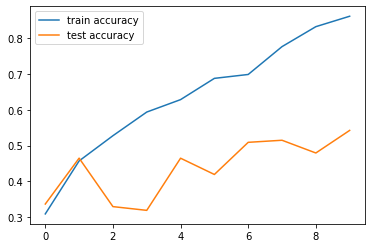

In [ ]:
plt.plot(model1.history.history['accuracy'], label='train accuracy')
plt.plot(model1.history.history['val_accuracy'], label='test accuracy')
plt.legend()
plt.show()

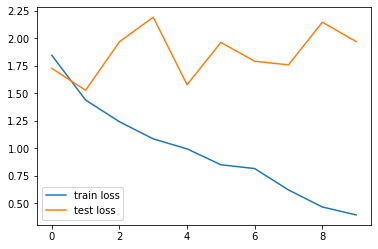

In [ ]:
plt.plot(model1.history.history['loss'], label='train loss')
plt.plot(model1.history.history['val_loss'], label='test loss')
plt.legend()
plt.show()

In [ ]:
vgg16= VGG16(include_top=False, input_shape=(224,224,3), classes=7)

In [ ]:
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
X=vgg16.output
X=Flatten()(X)
X=Dense(1024, activation='relu')(X)
X=Dropout(0.3)(X)
X=Dense(512, activation='relu')(X)
X=Dropout(0.2)(X)
X=Dense(256, activation='relu')(X)
output=Dense(7, activation='softmax')(X)

In [ ]:
model2=Model(inputs=vgg16.input, outputs=output)

In [ ]:
model2.compile(optimizer='adam', loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [ ]:
model2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
model2.fit(training_ds, validation_data=validation_ds, batch_size=16, epochs=10)

Epoch 1/10
289/289 [==============================] - 111s 365ms/step - loss: 2.0237 - accuracy: 0.2424 - val_loss: 1.7992 - val_accuracy: 0.2584
Epoch 2/10
289/289 [==============================] - 97s 333ms/step - loss: 1.8110 - accuracy: 0.2482 - val_loss: 1.7893 - val_accuracy: 0.2603
Epoch 3/10
289/289 [==============================] - 96s 332ms/step - loss: 1.8071 - accuracy: 0.2480 - val_loss: 1.8022 - val_accuracy: 0.2591
Epoch 4/10
289/289 [==============================] - 96s 332ms/step - loss: 1.7954 - accuracy: 0.2487 - val_loss: 1.7644 - val_accuracy: 0.2673
Epoch 5/10
289/289 [==============================] - 97s 333ms/step - loss: 1.6730 - accuracy: 0.3230 - val_loss: 1.6132 - val_accuracy: 0.3497
Epoch 6/10
289/289 [==============================] - 97s 334ms/step - loss: 1.4931 - accuracy: 0.4028 - val_loss: 1.4315 - val_accuracy: 0.4495
Epoch 7/10
289/289 [==============================] - 97s 335ms/step - loss: 1.3834 - accuracy: 0.4608 - val_loss: 1.3744 - val_a

In [ ]:
plt.plot(model2.history.history['accuracy'], label='train accuracy')
plt.plot(model2.history.history['val_accuracy'], label='test accuracy')
plt.legend()
plt.show()

KeyError: ignored

In [ ]:
plt.plot(model2.history.history['loss'], label='train loss')
plt.plot(model2.history.history['val_loss'], label='test loss')
plt.legend()
plt.show()

KeyError: ignored

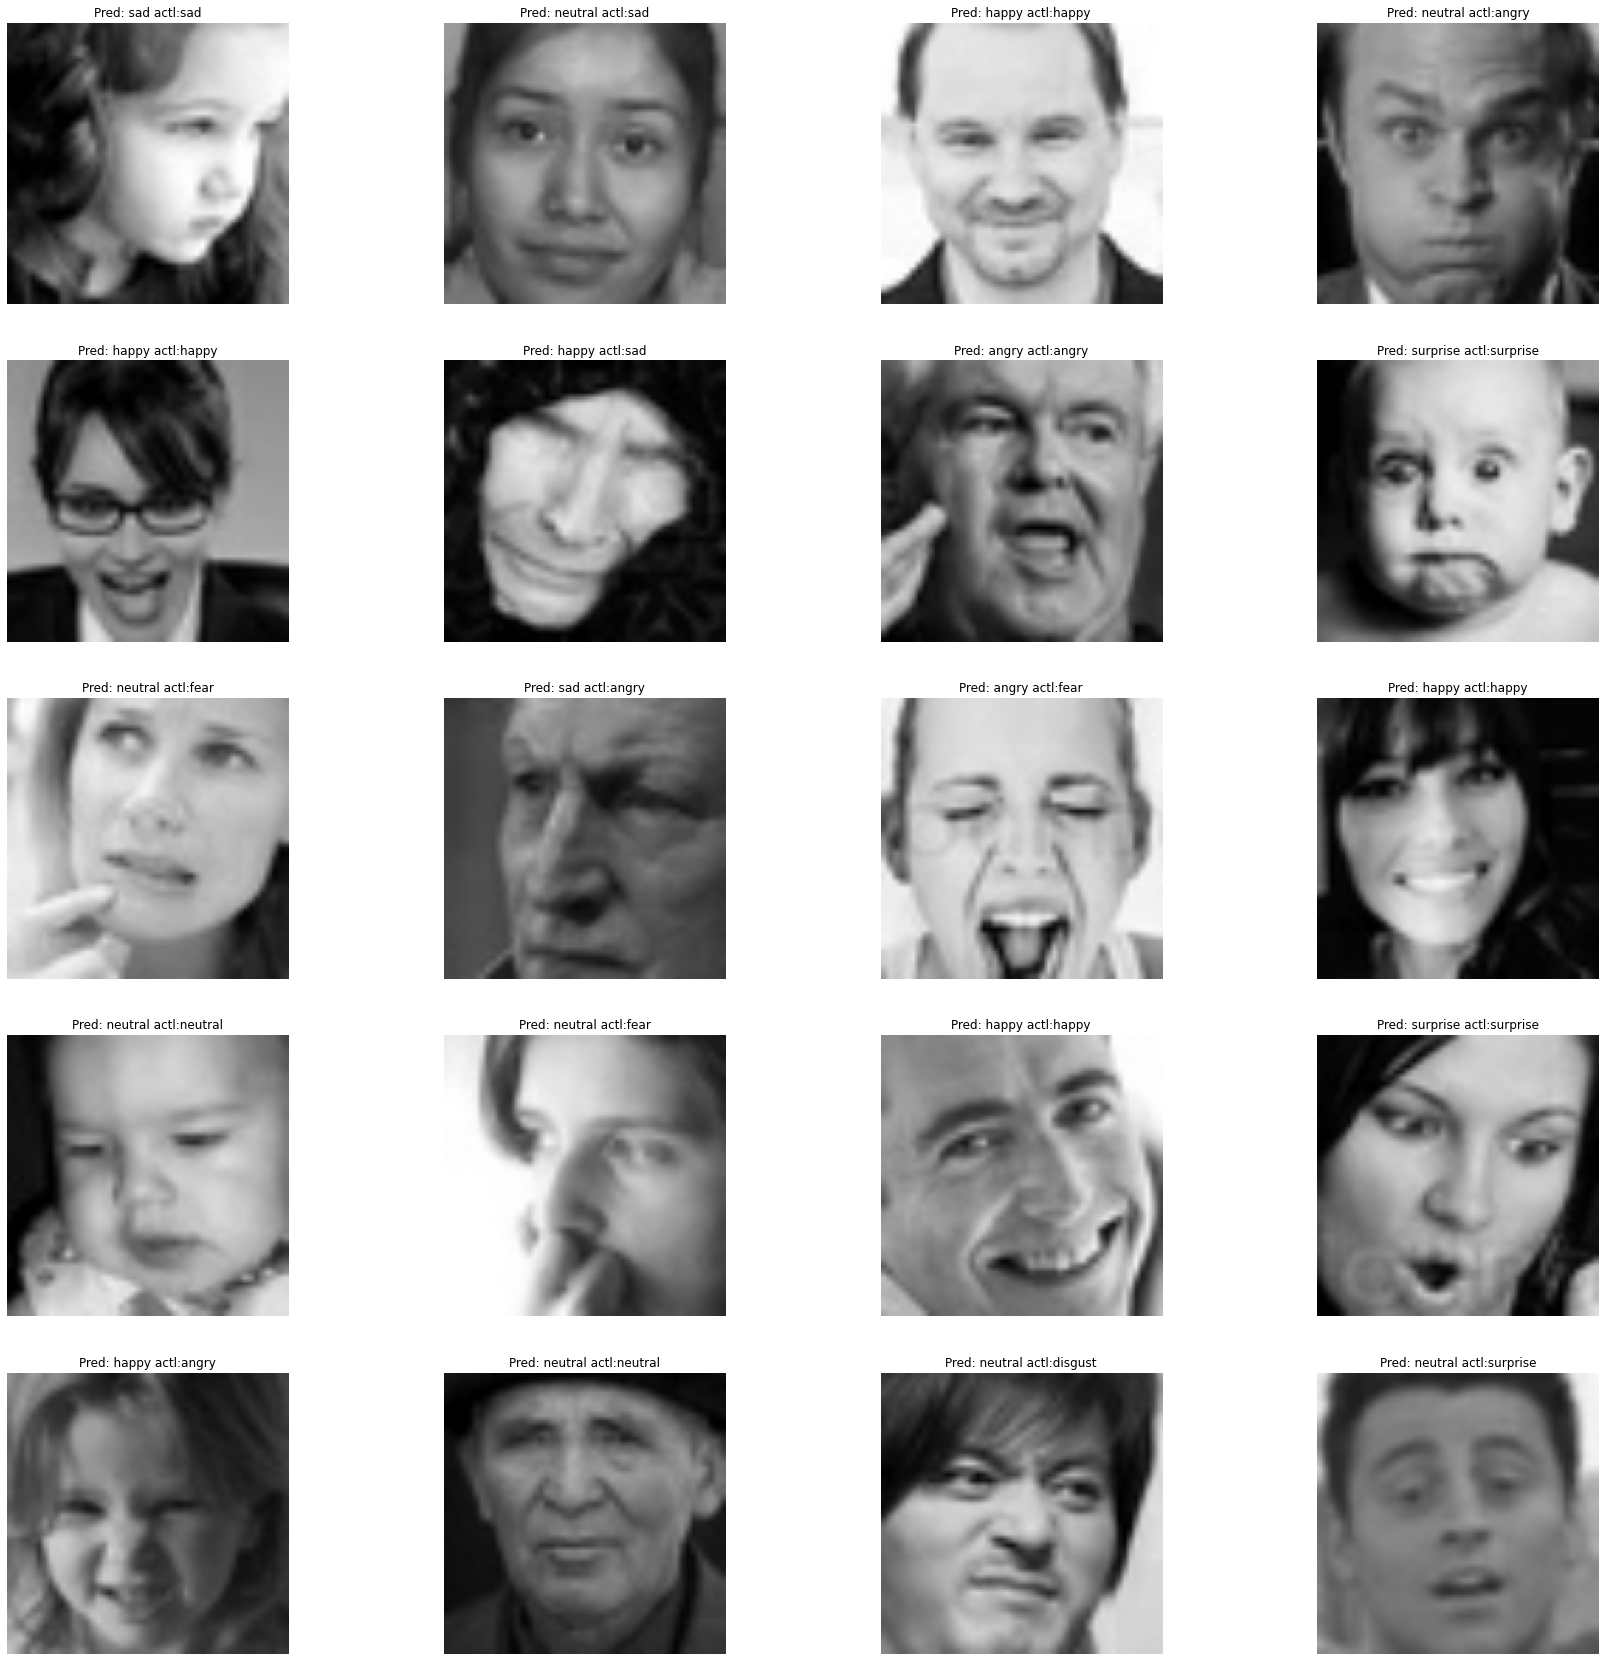

In [ ]:
AccuracyVector = []
plt.figure(figsize=(30, 30))
for images, labels in validation_ds.take(1):
    predictions = model2.predict(images)
    predlabel = []
    prdlbl = []
    
    for mem in predictions:
        predlabel.append(class_names[np.argmax(mem)])
        prdlbl.append(np.argmax(mem))
    
    AccuracyVector = np.array(prdlbl) == labels
    for i in range(20):
        ax = plt.subplot(5, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title('Pred: '+ predlabel[i]+' actl:'+class_names[labels[i]] )
        plt.axis('off')
        plt.grid(True)

In [ ]:
resnet50= ResNet50(include_top=False, input_shape=(100,100,3), classes=7)

In [ ]:
resnet50.summary()

In [ ]:
X=resnet50.output
X=Flatten()(X)
X=Dense(1024, activation='relu')(X)
X=Dropout(0.3)(X)
X=Dense(512, activation='relu')(X)
X=Dropout(0.2)(X)
X=Dense(256, activation='relu')(X)
output=Dense(7, activation='softmax')(X)

In [ ]:
model3=Model(inputs=resnet50.input, outputs=output)

In [ ]:
model3.compile(optimizer='adam', loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [ ]:
model3.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [ ]:
model3.fit(training_ds, validation_data=validation_ds, batch_size=16, epochs=10)

Epoch 1/10
289/289 [==============================] - 99s 316ms/step - loss: 1.5947 - accuracy: 0.4390 - val_loss: 2.2382 - val_accuracy: 0.3970
Epoch 2/10
289/289 [==============================] - 89s 308ms/step - loss: 1.1568 - accuracy: 0.5678 - val_loss: 1.3663 - val_accuracy: 0.5129
Epoch 3/10
289/289 [==============================] - 89s 308ms/step - loss: 1.0369 - accuracy: 0.6153 - val_loss: 1.2783 - val_accuracy: 0.5246
Epoch 4/10
289/289 [==============================] - 89s 308ms/step - loss: 0.9547 - accuracy: 0.6438 - val_loss: 1.2008 - val_accuracy: 0.5737
Epoch 5/10
289/289 [==============================] - 89s 308ms/step - loss: 0.8812 - accuracy: 0.6752 - val_loss: 1.4176 - val_accuracy: 0.4672
Epoch 6/10
289/289 [==============================] - 89s 308ms/step - loss: 0.7936 - accuracy: 0.7063 - val_loss: 1.2450 - val_accuracy: 0.5720
Epoch 7/10
289/289 [==============================] - 89s 308ms/step - loss: 0.8624 - accuracy: 0.6852 - val_loss: 1.6927 - val_ac

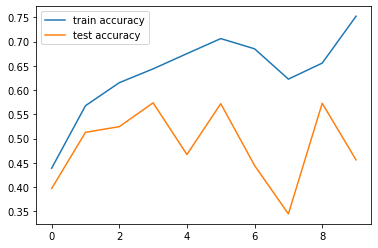

In [ ]:
plt.plot(model3.history.history['accuracy'], label='train accuracy')
plt.plot(model3.history.history['val_accuracy'], label='test accuracy')
plt.legend()
plt.show()

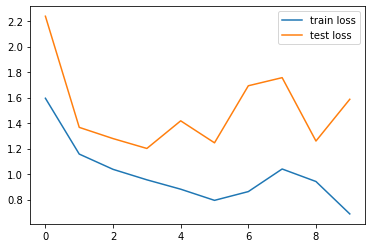

In [ ]:
plt.plot(model3.history.history['loss'], label='train loss')
plt.plot(model3.history.history['val_loss'], label='test loss')
plt.legend()
plt.show()

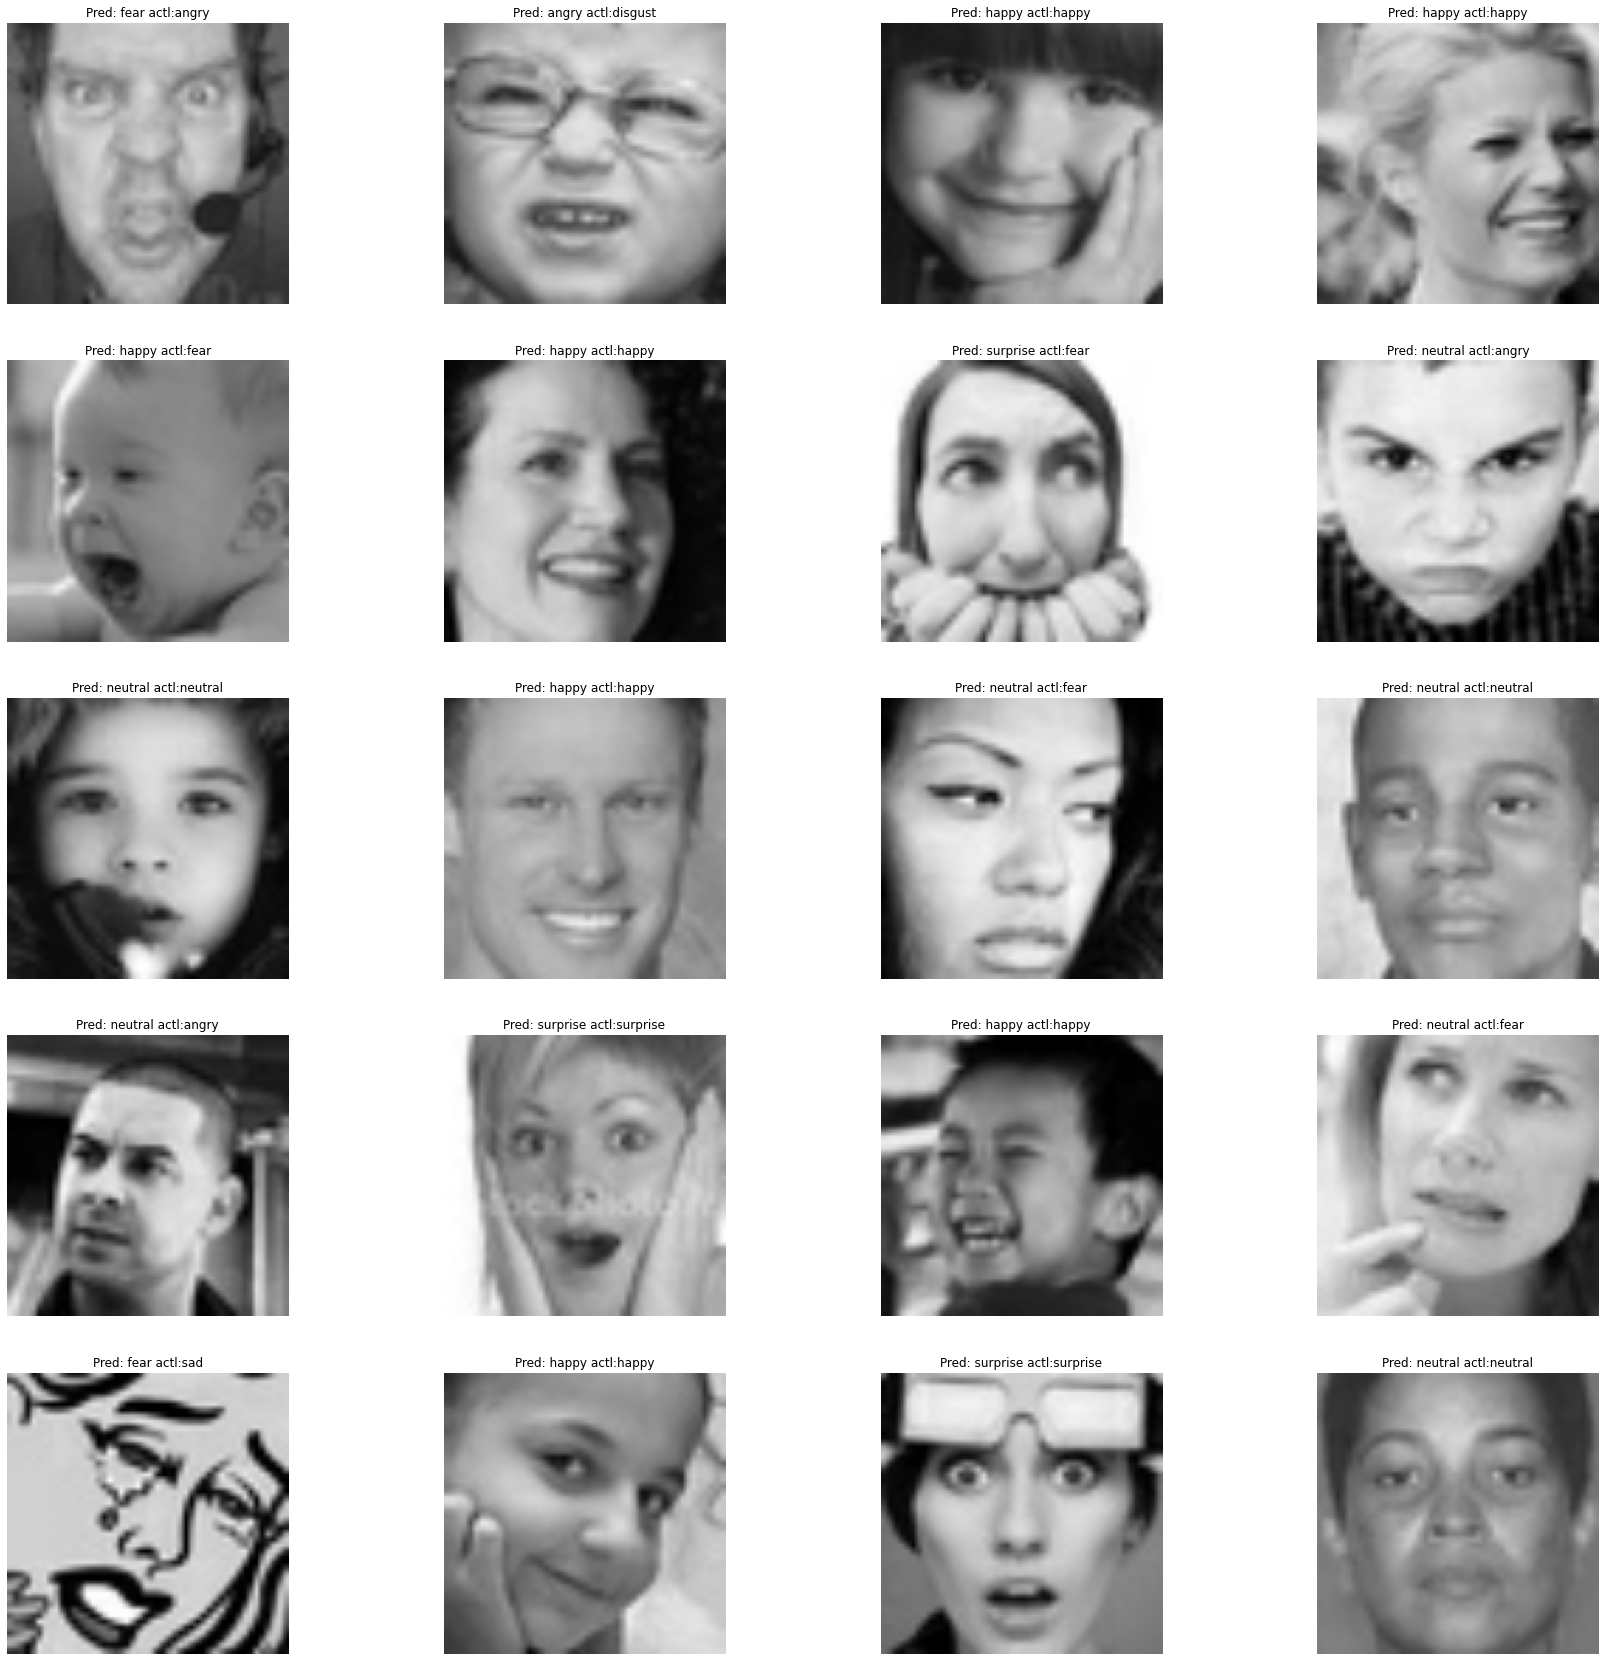

In [ ]:
AccuracyVector = []
plt.figure(figsize=(30, 30))
for images, labels in validation_ds.take(1):
    predictions = model2.predict(images)
    predlabel = []
    prdlbl = []
    
    for mem in predictions:
        predlabel.append(class_names[np.argmax(mem)])
        prdlbl.append(np.argmax(mem))
    
    AccuracyVector = np.array(prdlbl) == labels
    for i in range(20):
        ax = plt.subplot(5, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title('Pred: '+ predlabel[i]+' actl:'+class_names[labels[i]] )
        plt.axis('off')
        plt.grid(True)